In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain



In [2]:

data1= pd.read_excel ('Data_Train.xlsx')
data2=pd.read_excel('Data_Test.xlsx')

In [3]:
data1.dtypes

Restaurant       object
Location         object
Cuisines         object
Average_Cost     object
Minimum_Order    object
Rating           object
Votes            object
Reviews          object
Delivery_Time    object
dtype: object

In [4]:
data1['Average_Cost'] = data1['Average_Cost'].replace('₹', '')

In [5]:
#Strip the '₹' sign from every column having same symbol
data1['Average_Cost'] = (data1['Average_Cost'].str.strip('₹'))
data1['Minimum_Order'] = (data1['Minimum_Order'].str.strip('₹'))
data2['Minimum_Order'] = (data2['Minimum_Order'].str.strip('₹'))
data2['Average_Cost'] = (data2['Average_Cost'].str.strip('₹'))
data1['Average_Cost'] = (data1['Average_Cost'].str.replace(',',''))
data1['Minimum_Order'] = (data1['Minimum_Order'].str.replace(',',''))
data2['Minimum_Order'] = (data2['Minimum_Order'].str.replace(',',''))
data2['Average_Cost'] = (data2['Average_Cost'].str.replace(',',''))
data1['Average_Cost'] = (data1['Average_Cost'].str.replace('-',''))
data1['Minimum_Order'] = (data1['Minimum_Order'].str.replace('-',''))
data2['Minimum_Order'] = (data2['Minimum_Order'].str.replace('-',''))
data2['Average_Cost'] = (data2['Average_Cost'].str.replace('-',''))
data1['Average_Cost'] = (data1['Average_Cost'].str.replace('for','00'))









# data1.Rating.isnull()=="
#data1.isna().any()[lambda x: x]
#data1.[data1.isna().any()].tolist()   
#Check for null values in Train and Test Data.import locale


In [6]:
#Convert the datatype of AVerage_Cost and Minimum_Order.
# conv = lambda x: (x[1:-1])
# data1.Average_Cost = data1.Average_Cost.apply(conv)
data1['Average_Cost']=data1['Average_Cost'].astype(int)
data2['Average_Cost']=data2['Average_Cost'].astype(int)
data1['Minimum_Order']=data1['Minimum_Order'].astype(int)
data2['Minimum_Order']=data2['Minimum_Order'].astype(int)

In [7]:
#Check the datatype after the conversion.
data1.dtypes

Restaurant       object
Location         object
Cuisines         object
Average_Cost      int64
Minimum_Order     int64
Rating           object
Votes            object
Reviews          object
Delivery_Time    object
dtype: object

In [8]:
data2.dtypes

Restaurant       object
Location         object
Cuisines         object
Average_Cost      int64
Minimum_Order     int64
Rating           object
Votes            object
Reviews          object
dtype: object

In [9]:
print("----------Missing value-----------")
print(data1.isnull().sum())
print("----------Null value-----------")
print(data1.isna().sum())


----------Missing value-----------
Restaurant       0
Location         0
Cuisines         0
Average_Cost     0
Minimum_Order    0
Rating           0
Votes            0
Reviews          0
Delivery_Time    0
dtype: int64
----------Null value-----------
Restaurant       0
Location         0
Cuisines         0
Average_Cost     0
Minimum_Order    0
Rating           0
Votes            0
Reviews          0
Delivery_Time    0
dtype: int64


In [10]:
print('Number of duplicates:', len(data1[data1.duplicated()]))

Number of duplicates: 0


In [11]:
print(len(data1['Minimum_Order'].unique()))
#Check how many unique values in Minimum_order column.

18


In [12]:
data1['Delivery_Time'].unique()    
#Check how many unique values in Delivery_Time column so we need to distinuish this problem into calssifiaction problem.


array(['30 minutes', '65 minutes', '45 minutes', '10 minutes',
       '20 minutes', '120 minutes', '80 minutes'], dtype=object)

In [13]:
#CONVERT delievery time column object into 
data1['Delivery_Time'] = (data1['Delivery_Time'].str.replace('minutes',''))
data1['Delivery_Time']=data1['Delivery_Time'].astype(int)

In [14]:
data1.Delivery_Time.dtype

dtype('int64')

In [15]:
data1.head(4)

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200,50,3.5,12,4,30
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",100,50,3.5,11,4,30
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",150,50,3.6,99,30,65
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",250,99,3.7,176,95,30


<function matplotlib.pyplot.show(*args, **kw)>

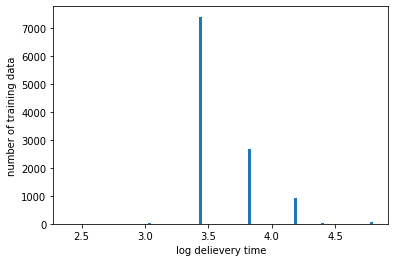

In [16]:
data1['log_delievery_time']=np.log(data1['Delivery_Time'].values+1)
plt.hist(data1['log_delievery_time'].values,bins=100)
plt.xlabel("log delievery time")
plt.ylabel("number of training data")
plt.show

In [17]:
pd.to_numeric(data1.Rating, errors='coerce')
data1['Rating']= data1['Rating'].apply(pd.to_numeric, errors='coerce').fillna(0)

In [18]:
pd.to_numeric(data2.Rating, errors='coerce')
data2['Rating']= data2['Rating'].apply(pd.to_numeric, errors='coerce').fillna(0)

In [19]:
pd.to_numeric(data1.Votes, errors='coerce')
data1['Votes']= data1['Votes'].apply(pd.to_numeric, errors='coerce').fillna(0)

In [20]:
pd.to_numeric(data2.Votes, errors='coerce')
data2['Votes']= data2['Votes'].apply(pd.to_numeric, errors='coerce').fillna(0)

In [21]:
pd.to_numeric(data1.Reviews, errors='coerce')
data1['Reviews']= data1['Reviews'].apply(pd.to_numeric, errors='coerce').fillna(0)

In [22]:
pd.to_numeric(data2.Reviews, errors='coerce')
data2['Reviews']= data2['Reviews'].apply(pd.to_numeric, errors='coerce').fillna(0)

In [23]:
data1.dtypes

Restaurant             object
Location               object
Cuisines               object
Average_Cost            int64
Minimum_Order           int64
Rating                float64
Votes                 float64
Reviews               float64
Delivery_Time           int64
log_delievery_time    float64
dtype: object

In [24]:
data2.dtypes

Restaurant        object
Location          object
Cuisines          object
Average_Cost       int64
Minimum_Order      int64
Rating           float64
Votes            float64
Reviews          float64
dtype: object

In [25]:
print("Train set mean of Votes :",data1.Votes.mean())
print("Test set mean of Votes :",data2.Votes.mean())
print("Train set mean of Reviews :",data1.Reviews.mean())
print("Test set mean of Reviews :",data2.Reviews.mean())
print("Train set mean of Rating :",data1.Rating.mean())
print("Test set mean of Rating :",data2.Rating.mean())

Train set mean of Votes : 198.8273841716243
Test set mean of Votes : 182.58976207642394
Train set mean of Reviews : 97.5629168920137
Test set mean of Reviews : 87.59444844989186
Train set mean of Rating : 2.974085091040189
Test set mean of Rating : 2.9420692141312177


In [26]:
data1.describe()

,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,log_delievery_time
count,11094.000000,11094.000000,11094.000000,11094.000000,11094.000000,11094.000000,11094.000000
mean,202.690644,53.344511,2.974085,198.827384,97.562917,37.056066,3.599408
std,129.847522,18.551245,1.429344,509.520666,289.972698,12.447496,0.264111
min,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2.397895
25%,100.000000,50.000000,3.000000,7.000000,2.000000,30.000000,3.433987
50%,200.000000,50.000000,3.500000,37.000000,14.000000,30.000000,3.433987
75%,200.000000,50.000000,3.800000,157.000000,63.000000,45.000000,3.828641
max,2050.000000,500.000000,4.900000,9054.000000,6504.000000,120.000000,4.795791


In [27]:
data1['Votes']=data1['Votes'].replace(0.0,236.00)
data2['Votes']=data2['Votes'].replace(0.0,182.00)
data1['Reviews']=data1['Reviews'].replace(0.0,97.6)
data2['Reviews']=data2['Reviews'].replace(0.0,87.5)
data1['Rating']=data1['Rating'].replace(0.0,2.98)
data2['Rating']=data2['Rating'].replace(0.0,2.95)


<function matplotlib.pyplot.show(*args, **kw)>

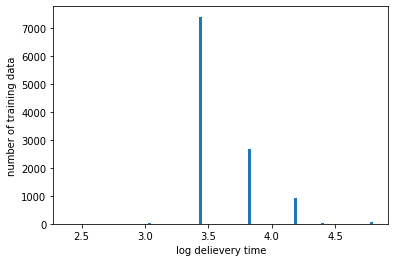

In [28]:
data1['log_delievery_time']=np.log(data1['Delivery_Time'].values+1)
plt.hist(data1['log_delievery_time'].values,bins=100)
plt.xlabel("log delievery time")
plt.ylabel("number of training data")
plt.show

In [29]:
data1.describe(include='object')

,Restaurant,Location,Cuisines
count,11094,11094,11094
unique,7480,35,2179
top,ID_7184,"Mico Layout, Stage 2, BTM Layout,Bangalore",North Indian
freq,22,947,850


In [30]:
data2.describe()

,Average_Cost,Minimum_Order,Rating,Votes,Reviews
count,2774.000000,2774.000000,2774.000000,2774.000000,2774.000000
mean,195.385725,53.300288,3.481236,218.149964,106.299387
std,114.509785,18.619802,0.447750,472.622516,259.596936
min,50.000000,0.000000,2.100000,4.000000,1.000000
25%,100.000000,50.000000,3.000000,24.250000,10.000000
50%,200.000000,50.000000,3.500000,108.000000,48.000000
75%,200.000000,50.000000,3.800000,182.000000,87.500000
max,1200.000000,500.000000,4.800000,7811.000000,3863.000000


In [31]:
print("----------Missing value-----------")
print(data1.isnull().sum())
print("----------Null value-----------")
print(data1.isna().sum())


----------Missing value-----------
Restaurant            0
Location              0
Cuisines              0
Average_Cost          0
Minimum_Order         0
Rating                0
Votes                 0
Reviews               0
Delivery_Time         0
log_delievery_time    0
dtype: int64
----------Null value-----------
Restaurant            0
Location              0
Cuisines              0
Average_Cost          0
Minimum_Order         0
Rating                0
Votes                 0
Reviews               0
Delivery_Time         0
log_delievery_time    0
dtype: int64


In [32]:
data2['Reviews']=data2['Reviews'].astype(int)
data1['Reviews']=data1['Reviews'].astype(int)
data2['Votes']=data2['Votes'].astype(int)
data1['Votes']=data1['Votes'].astype(int)

In [33]:
data1.dtypes

Restaurant             object
Location               object
Cuisines               object
Average_Cost            int64
Minimum_Order           int64
Rating                float64
Votes                   int64
Reviews                 int64
Delivery_Time           int64
log_delievery_time    float64
dtype: object

In [34]:
data2.dtypes

Restaurant        object
Location          object
Cuisines          object
Average_Cost       int64
Minimum_Order      int64
Rating           float64
Votes              int64
Reviews            int64
dtype: object

In [35]:
# print(len(set(data1['Restaurant'])))
# print(len(set(data2['Restaurant'])))
# a1=set(data1['Restaurant'])

# a2=set(data2['Restaurant'])

In [36]:
data1['Delivery_Time'].value_counts()

30     7406
45     2665
65      923
120      62
20       20
80       14
10        4
Name: Delivery_Time, dtype: int64

In [37]:
cities={'Pune':['FTI College, Law College Road, Pune','Pune University','MG Road, Pune','Nathan Road, Mangaldas Road, Pune']
        ,'Noida':['Sector 1, Noida','D-Block, Sector 63, Noida','Sector 14, Noida']
        ,'Kolkata':['Moulali, Kolkata','Gora Bazar, Rajbari, North Dumdum, Kolkata','Tiretti, Kolkata','Chandni Chowk, Kolkata','Raja Bazar, Kolkata']
        ,'Bangalore':['Sector 3, Marathalli','Rmz Centennial, I Gate, Whitefield','Mico Layout, Stage 2, BTM Layout,Bangalore','Majestic','BTM Layout 1, Electronic City']
        ,'Mumbai':['Mumbai Central','Yerawada, Pune, Maharashtra','Dockyard Road, Mumbai CST Area','Sandhurst Road, Mumbai CST Area','Tejas Nagar Colony, Wadala West, Mumbai']
        ,'Hyderabad':['Hyderabad Public School, Begumpet','Chatta Bazaar, Malakpet, Hyderabad','Panjetan Colony, Malakpet, Hyderabad','Jaya Nagar, Saidabad, Hyderabad','Noorkhan Bazaar, Malakpet, Hyderabad','Musi Nagar, Malakpet, Hyderabad']
        ,'Delhi':['Delhi University-GTB Nagar','Delhi Administration Flats, Timarpur','Delhi High Court, India Gate','Delhi Cantt.','Babarpur, New Delhi, Delhi']
       ,'Gurgoan':['Laxman Vihar Industrial Area, Sector 3A, Gurgoan','Sector 63A,Gurgaon']}


In [38]:
for k, v in cities.items():
     for i in v:
         data1.loc[(data1.Location==i),'Location']=k


In [39]:
data1

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,log_delievery_time
0,ID_6321,Pune,"Fast Food, Rolls, Burger, Salad, Wraps",200,50,3.50,12,4,30,3.433987
1,ID_2882,Bangalore,"Ice Cream, Desserts",100,50,3.50,11,4,30,3.433987
2,ID_1595,Mumbai,"Italian, Street Food, Fast Food",150,50,3.60,99,30,65,4.189655
3,ID_5929,Noida,"Mughlai, North Indian, Chinese",250,99,3.70,176,95,30,3.433987
4,ID_6123,Bangalore,"Cafe, Beverages",200,99,3.20,521,235,65,4.189655
5,ID_5221,Bangalore,"South Indian, North Indian, Chinese",150,50,3.80,46,18,30,3.433987
6,ID_3777,Mumbai,"Beverages, Fast Food",150,50,3.70,108,31,30,3.433987
7,ID_745,Delhi,"Chinese, Thai, Asian",650,50,4.00,1731,1235,45,3.828641
8,ID_2970,Delhi,"Mithai, Street Food",100,50,3.90,110,26,30,3.433987
9,ID_3474,Noida,"Fast Food, North Indian, Rolls, Chinese, Momos...",200,50,3.90,562,294,65,4.189655


In [40]:
data1.head(4)

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,log_delievery_time
0,ID_6321,Pune,"Fast Food, Rolls, Burger, Salad, Wraps",200,50,3.5,12,4,30,3.433987
1,ID_2882,Bangalore,"Ice Cream, Desserts",100,50,3.5,11,4,30,3.433987
2,ID_1595,Mumbai,"Italian, Street Food, Fast Food",150,50,3.6,99,30,65,4.189655
3,ID_5929,Noida,"Mughlai, North Indian, Chinese",250,99,3.7,176,95,30,3.433987


In [41]:
# from sklearn.model_selection import train_test_split 
# from sklearn.tree import DecisionTreeClassifier 
# from sklearn.metrics import accuracy_score 
# X=data1.loc[:,['Average_Cost','Minimum_Order','Votes','Reviews']]
# Y=data1.loc[:,['Delivery_Time']]

In [42]:
# X.shape

In [43]:
# X_train, X_test, y_train, y_test = train_test_split( 
#            X,Y,test_size = 0.2, random_state = 100) 
  
# dt_clf_gini = DecisionTreeClassifier(criterion = "gini", 
#                                      random_state = 100, 
#                                      max_depth = 5, 
#                                      min_samples_leaf = 5) 
  
# dt_clf_gini.fit(X_train, y_train) 
# y_pred_gini = dt_clf_gini.predict(X_test) 
  
# print ("Desicion Tree using Gini Index\nAccuracy is ", 
#              accuracy_score(y_test, y_pred_gini)*100 ) 

In [44]:
# from sklearn.model_selection import train_test_split 
# # from sklearn.tree import DecisionTreeClassifier 
# # from sklearn.metrics import accuracy_score 
# X1=data1.loc[:,['Average_Cost','Minimum_Order','Votes','Reviews']]
# Y1=data1.loc[:,['Delivery_Time']]

In [45]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2

In [46]:
# best_feat=SelectKBest(score_func=chi2,k=3)
# fit=best_feat.fit(X1,Y1)

In [47]:
# fea_scores

In [48]:
# fea_scores=pd.concat([df_columns,df_scores],axis=1)
# fea_scores.columns=['Specs','Scores']

In [49]:
# fea_scores

In [50]:
data1.head(5)

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,log_delievery_time
0,ID_6321,Pune,"Fast Food, Rolls, Burger, Salad, Wraps",200,50,3.5,12,4,30,3.433987
1,ID_2882,Bangalore,"Ice Cream, Desserts",100,50,3.5,11,4,30,3.433987
2,ID_1595,Mumbai,"Italian, Street Food, Fast Food",150,50,3.6,99,30,65,4.189655
3,ID_5929,Noida,"Mughlai, North Indian, Chinese",250,99,3.7,176,95,30,3.433987
4,ID_6123,Bangalore,"Cafe, Beverages",200,99,3.2,521,235,65,4.189655


In [51]:
Cui=[]
for i in data1.Cuisines:
    a=i.split(',')
    count=len(a)
    Cui.append(count)

In [52]:
data1['Cuisines']=pd.DataFrame(Cui)

In [53]:
data1.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,log_delievery_time
0,ID_6321,Pune,5,200,50,3.5,12,4,30,3.433987
1,ID_2882,Bangalore,2,100,50,3.5,11,4,30,3.433987
2,ID_1595,Mumbai,3,150,50,3.6,99,30,65,4.189655
3,ID_5929,Noida,3,250,99,3.7,176,95,30,3.433987
4,ID_6123,Bangalore,2,200,99,3.2,521,235,65,4.189655


In [54]:
# data1_map = data1.Restaurant.value_counts().to_dict()

In [55]:
# data1.Restaurant = data1.Restaurant.map(data1_map)

In [56]:
data1=data1.drop(['log_delievery_time'], axis=1)

In [57]:
data1.head(5)

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,Pune,5,200,50,3.5,12,4,30
1,ID_2882,Bangalore,2,100,50,3.5,11,4,30
2,ID_1595,Mumbai,3,150,50,3.6,99,30,65
3,ID_5929,Noida,3,250,99,3.7,176,95,30
4,ID_6123,Bangalore,2,200,99,3.2,521,235,65


In [58]:
Cui=[]
for i in data2.Cuisines:
    a=i.split(',')
    count=len(a)
    Cui.append(count)

In [59]:
data2['Cuisines']=pd.DataFrame(Cui)

In [60]:
data2.head(5)

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews
0,ID_2842,"Mico Layout, Stage 2, BTM Layout,Bangalore",3,350,50,4.20,361,225
1,ID_730,"Mico Layout, Stage 2, BTM Layout,Bangalore",2,100,50,2.95,182,87
2,ID_4620,"Sector 1, Noida",1,100,50,3.60,36,16
3,ID_5470,"Babarpur, New Delhi, Delhi",5,200,50,3.60,66,33
4,ID_3249,"Sector 1, Noida",2,150,50,2.90,38,14


In [61]:
data1[data1.columns[::]].corr()['Delivery_Time'][:]

Cuisines         0.124872
Average_Cost     0.175236
Minimum_Order    0.254186
Rating           0.218392
Votes            0.189209
Reviews          0.169082
Delivery_Time    1.000000
Name: Delivery_Time, dtype: float64

In [62]:
cities2={'Pune':['FTI College, Law College Road, Pune','Pune University','MG Road, Pune','Nathan Road, Mangaldas Road, Pune']
        ,'Noida':['Sector 1, Noida','D-Block, Sector 63, Noida','Sector 14, Noida']
        ,'Kolkata':['Moulali, Kolkata','Gora Bazar, Rajbari, North Dumdum, Kolkata','Tiretti, Kolkata','Chandni Chowk, Kolkata','Raja Bazar, Kolkata']
        ,'Bangalore':['Sector 3, Marathalli','Rmz Centennial, I Gate, Whitefield','Mico Layout, Stage 2, BTM Layout,Bangalore','Majestic','BTM Layout 1, Electronic City']
        ,'Mumbai':['Mumbai Central','Yerawada, Pune, Maharashtra','Dockyard Road, Mumbai CST Area','Sandhurst Road, Mumbai CST Area','Tejas Nagar Colony, Wadala West, Mumbai']
        ,'Hyderabad':['Hyderabad Public School, Begumpet','Chatta Bazaar, Malakpet, Hyderabad','Panjetan Colony, Malakpet, Hyderabad','Jaya Nagar, Saidabad, Hyderabad','Noorkhan Bazaar, Malakpet, Hyderabad','Musi Nagar, Malakpet, Hyderabad']
        ,'Delhi':['Delhi University-GTB Nagar','Delhi Administration Flats, Timarpur','Delhi High Court, India Gate','Delhi Cantt.','Babarpur, New Delhi, Delhi']
       ,'Gurgoan':['Laxman Vihar Industrial Area, Sector 3A, Gurgoan','Sector 63A,Gurgaon']}

In [63]:
for k, v in cities2.items():
     for i in v:
         data2.loc[(data2.Location==i),'Location']=k

In [64]:
data2.head(5)

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews
0,ID_2842,Bangalore,3,350,50,4.20,361,225
1,ID_730,Bangalore,2,100,50,2.95,182,87
2,ID_4620,Noida,1,100,50,3.60,36,16
3,ID_5470,Delhi,5,200,50,3.60,66,33
4,ID_3249,Noida,2,150,50,2.90,38,14


In [65]:
data1.isna().sum()

Restaurant       0
Location         0
Cuisines         0
Average_Cost     0
Minimum_Order    0
Rating           0
Votes            0
Reviews          0
Delivery_Time    0
dtype: int64

In [66]:
data2.isna().sum()

Restaurant       0
Location         0
Cuisines         0
Average_Cost     0
Minimum_Order    0
Rating           0
Votes            0
Reviews          0
dtype: int64

In [67]:
# from sklearn.preprocessing import LabelEncoder
# le_color = LabelEncoder()
# data1['Location'] = le_color.fit_transform(data1.Location)
# data2['Location'] = le_color.fit_transform(data2.Location)

In [68]:
data1.head(5)

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,Pune,5,200,50,3.5,12,4,30
1,ID_2882,Bangalore,2,100,50,3.5,11,4,30
2,ID_1595,Mumbai,3,150,50,3.6,99,30,65
3,ID_5929,Noida,3,250,99,3.7,176,95,30
4,ID_6123,Bangalore,2,200,99,3.2,521,235,65


In [69]:
(data1.shape[1])

9

In [70]:
data1=pd.get_dummies(data1, columns=['Location'])

In [71]:
data1.head(5)

,Restaurant,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Location_Bangalore,Location_Delhi,Location_Gurgoan,Location_Hyderabad,Location_Kolkata,Location_Mumbai,Location_Noida,Location_Pune
0,ID_6321,5,200,50,3.5,12,4,30,0,0,0,0,0,0,0,1
1,ID_2882,2,100,50,3.5,11,4,30,1,0,0,0,0,0,0,0
2,ID_1595,3,150,50,3.6,99,30,65,0,0,0,0,0,1,0,0
3,ID_5929,3,250,99,3.7,176,95,30,0,0,0,0,0,0,1,0
4,ID_6123,2,200,99,3.2,521,235,65,1,0,0,0,0,0,0,0


In [72]:
data2=pd.get_dummies(data2, columns=['Location'])

In [73]:
data2.head(5)

,Restaurant,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Location_Bangalore,Location_Delhi,Location_Gurgoan,Location_Hyderabad,Location_Kolkata,Location_Mumbai,Location_Noida,Location_Pune
0,ID_2842,3,350,50,4.20,361,225,1,0,0,0,0,0,0,0
1,ID_730,2,100,50,2.95,182,87,1,0,0,0,0,0,0,0
2,ID_4620,1,100,50,3.60,36,16,0,0,0,0,0,0,1,0
3,ID_5470,5,200,50,3.60,66,33,0,1,0,0,0,0,0,0
4,ID_3249,2,150,50,2.90,38,14,0,0,0,0,0,0,1,0


In [74]:
X=data1.loc[:,['Average_Cost','Minimum_Order','Votes','Rating','Cuisines','Location_Bangalore','Location_Gurgoan','Location_Hyderabad','Location_Kolkata','Location_Mumbai','Location_Noida','Location_Pune']]
Y=data1.loc[:,['Delivery_Time']]

In [75]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state = 100) 


In [76]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
XGB = XGBClassifier()
XGB.fit(X_train, y_train)
y_pred = XGB.predict(X_test)
predictions = [round(value) for value in y_pred]

/home/himanshu.t@idexcel.internal/anaconda3/envs/pdf_test/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/himanshu.t@idexcel.internal/anaconda3/envs/pdf_test/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [77]:
from sklearn.metrics import accuracy_score


In [78]:
accuracy = accuracy_score(y_test, predictions)

In [79]:
print(accuracy)

0.733213159080667


In [80]:
skewValue = data1.skew(axis=0)

In [81]:
skewValue

Cuisines              1.232586
Average_Cost          2.938567
Minimum_Order         7.390346
Rating                0.228977
Votes                 6.293221
Reviews               7.850144
Delivery_Time         2.579849
Location_Bangalore    1.567156
Location_Delhi        1.635364
Location_Gurgoan      3.436434
Location_Hyderabad    5.160057
Location_Kolkata      4.168350
Location_Mumbai       2.093931
Location_Noida        1.597052
Location_Pune         1.988773
dtype: float64

In [82]:
data1.kurtosis()

Cuisines                2.172317
Average_Cost           14.052062
Minimum_Order         118.908612
Rating                 -0.673473
Votes                  58.189239
Reviews                98.824274
Delivery_Time          10.441096
Location_Bangalore      0.456062
Location_Delhi          0.674538
Location_Gurgoan        9.810847
Location_Hyderabad     24.630625
Location_Kolkata       15.377915
Location_Mumbai         2.384975
Location_Noida          0.550673
Location_Pune           1.955571
dtype: float64


Skewness for data :  [2.57950034]


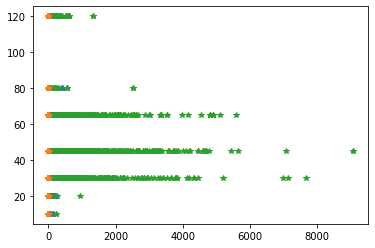

In [83]:
from scipy.stats import skew 
import numpy as np  
import pylab as p  
  
p.plot(X,Y, '*') 
  
print( '\nSkewness for data : ', skew(Y)) 

In [84]:
# X2_test=data2.loc[:,['Location','Average_Cost','Minimum_Order','Votes','Rating','Cuisines']]

In [85]:
# y_pred2_test = XGB.predict(X2_test)
# predictions = [round(value) for value in y_pred2_test]

In [86]:

# X2_test=data2.loc[:,['Average_Cost','Minimum_Order','Votes','Rating','Cuisines']]

In [87]:
y_pred2_test

NameError: name 'y_pred2_test' is not defined

In [ ]:
string=" minutes"

In [ ]:
y_pred2_test=y_pred2_test.tolist()

In [ ]:
my_new_list2_test = pd.DataFrame([str(x) + string for x in y_pred2_test],columns=["Delivery_Time"])


In [ ]:
my_new_list2_test.Delivery_Time.value_counts()

In [ ]:
my_new_list2_test.to_excel('Submission11.xlsx', index=False)

In [ ]:
# from xgboost import XGBClassifier

# XGB = XGBClassifier()
# XGB.fit(X_train, y_train)
# y_pred = XGB.predict(X_test)
# 

In [ ]:
# y_pred_test

In [ ]:
# 

In [ ]:
# y_pred_test=y_pred_test.tolist()

In [ ]:
# my_new_list2_test = pd.DataFrame([str(x) + string for x in y_pred_test],columns=["Delivery_Time"])

In [ ]:
# my_new_list2_test.Delivery_Time.value_counts()

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

In [ ]:
# scaler = MinMaxScaler()


In [ ]:
# data1_new=data1.loc[:,['Average_Cost','Minimum_Order','Votes','Rating','Cuisines']]

In [ ]:
# df_scaled = pd.DataFrame(scaler.fit_transform(data1_new), columns=data1_new.columns)


In [ ]:
# from sklearn.model_selection import train_test_split 
# X_train, X_test, y_train, y_test = train_test_split(df_scaled,Y,test_size = 0.2, random_state = 100) 

In [ ]:
# from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score
# XGB = XGBClassifier()
# XGB.fit(X_train, y_train)
# 

In [ ]:
# accuracy = accuracy_score(y_test, predictions)

In [ ]:
# print(accuracy)

In [ ]:
# import xgboost as xgb
# from sklearn.model_selection import GridSearchCV

In [ ]:
# from xgboost import XGBClassifier
# XGB = XGBClassifier()
# XGB.fit(X_train, y_train)
# y_pred = XGB.predict(X_test)
# predictions = [round(value) for value in y_pred]
# accuracy = accuracy_score(y_test, predictions)



In [ ]:
# print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:

# data1.Location.value_counts()

In [ ]:
# ax = sns.countplot(x="Location", data=data1)

In [ ]:
# df_new_train=data1.loc[:,['Average_Cost','Minimum_Order','Votes','Reviews','Delivery_Time']]

# Handling the outliers

In [ ]:
# Q1 = df_new_train.quantile(0.25)
# Q3 = df_new_train.quantile(0.75)
# IQR = Q3 - Q1
# print(IQR)

In [ ]:
# df_new_train_out = df_new_train[~((df_new_train < (Q1 - 1.5 * IQR)) |(df_new_train > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
# df_new_train_out.shape

In [ ]:
# df_new_train.shape

In [ ]:
# data2.dtypes

In [ ]:
# df_new_test=data2.loc[:,['Average_Cost','Minimum_Order','Votes','Reviews']]

In [ ]:
# Q1 = df_new_test.quantile(0.25)
# Q3 = df_new_test.quantile(0.75)
# IQR = Q3 - Q1
# print(IQR)

In [ ]:
# df_new_test_out = df_new_test[~((df_new_test < (Q1 - 1.5 * IQR)) |(df_new_test > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
# df_new_test_out.shape


In [ ]:
# df_new_test.shape

# Now Apply XG BOOST AGAIN

In [ ]:
from xgboost.sklearn import XGBClassifier
from xgboost import XGBClassifier

In [ ]:
# X2=df_new_train_out.loc[:,['Average_Cost','Minimum_Order','Votes','Reviews']]
# Y2=df_new_train_out.loc[:,['Delivery_Time']]

In [ ]:
# X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,Y2,test_size = 0.2, random_state = 100) 

In [ ]:
# from xgboost import XGBClassifier
# XGB2= XGBClassifier(learning_rate =0.1,
#  n_estimators=1000,
#  max_depth=4,
#  min_child_weight=6,
#  gamma=0,
#  subsample=0.8,
#  colsample_bytree=0.8,
#  objective= None,
#  nthread=4,
#  scale_pos_weight=1,
#  seed=27)
# XGB2.fit(X_train2, y_train2)
# y_pred = XGB2.predict(X_test2)
# predictions = [round(value) for value in y_pred]
# accuracy = accuracy_score(y_test2, predictions)


In [ ]:
#print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
# print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
# y_pred

In [ ]:
# type(y_pred)

In [ ]:
# y_pred=y_pred.tolist()

In [ ]:
string=" minutes"

In [ ]:
cities2={'Pune':['FTI College, Law College Road, Pune','Pune University','MG Road, Pune','Nathan Road, Mangaldas Road, Pune']
        ,'Noida':['Sector 1, Noida','D-Block, Sector 63, Noida','Sector 14, Noida']
        ,'Kolkata':['Moulali, Kolkata','Gora Bazar, Rajbari, North Dumdum, Kolkata','Tiretti, Kolkata','Chandni Chowk, Kolkata','Raja Bazar, Kolkata']
        ,'Bangalore':['Sector 3, Marathalli','Rmz Centennial, I Gate, Whitefield','Mico Layout, Stage 2, BTM Layout,Bangalore','Majestic','BTM Layout 1, Electronic City']
        ,'Mumbai':['Mumbai Central','Yerawada, Pune, Maharashtra','Dockyard Road, Mumbai CST Area','Sandhurst Road, Mumbai CST Area','Tejas Nagar Colony, Wadala West, Mumbai']
        ,'Hyderabad':['Hyderabad Public School, Begumpet','Chatta Bazaar, Malakpet, Hyderabad','Panjetan Colony, Malakpet, Hyderabad','Jaya Nagar, Saidabad, Hyderabad','Noorkhan Bazaar, Malakpet, Hyderabad','Musi Nagar, Malakpet, Hyderabad']
        ,'Delhi':['Delhi University-GTB Nagar','Delhi Administration Flats, Timarpur','Delhi High Court, India Gate','Delhi Cantt.','Babarpur, New Delhi, Delhi']
       ,'Gurgoan':['Laxman Vihar Industrial Area, Sector 3A, Gurgoan','Sector 63A,Gurgaon']}

In [ ]:
for k, v in cities2.items():
     for i in v:
         data2.loc[(data2.Location==i),'Location']=k

In [ ]:
# X2_test=data2.loc[:,['Average_Cost','Minimum_Order','Votes','Reviews']]

In [ ]:
# y_pred2_test = XGB.predict(X2_test)
# predictions = [round(value) for value in y_pred2_test]

In [ ]:
# y_pred2_test

In [ ]:
# len(y_pred2_test)

In [ ]:
# y_pred2_test=y_pred2_test.tolist()

In [ ]:
# my_new_list2_test = pd.DataFrame([str(x) + string for x in y_pred2_test],columns=["Delivery_Time"])

In [ ]:
# my_new_list2_test.to_excel('Submission8.xlsx', index=False)

In [ ]:
# data2.head

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import LabelEncoder

# ohe = OneHotEncoder(categorical_features = [1])
# X = ohe.fit_transform(X).toarray()


In [ ]:
# for col in data1.columns[0:1]:
#     print(col, ': ', len(data1[col].unique()), ' labels')

In [ ]:
# data1.Restaurant.value_counts().to_dict()

In [ ]:
#data1_map = data1.Restaurant.value_counts().to_dict()

In [ ]:
# data1.Restaurant = data1.Restaurant.map(data1_map)

In [ ]:
# data1.Restaurant.value_counts(asce                                                                                                                   )

In [ ]:
# i.split(',')
#     #print(i)
#     count=len(i)
#     print(count,value)
#     cuis.append(count)
    

In [ ]:
# from sklearn.model_selection import GridSearchCV
# import sklearn

In [ ]:
# data1=pd.DataFrame(cuis)

In [ ]:
# data1

In [ ]:
# from sklearn.metrics import accuracy_score

# train_labels = [x for x in data1.columns if x not in ['Delivery_Time','Restaurant','Location','Cuisines']]
# train_data_features=data2
# def modelfit(alg, train_data_features, train_labels,useTrainCV=True, cv_folds=5):

#     if useTrainCV:
#         params=alg.get_xgb_params()
#         xgb_param=dict([(key,[params[key]]) for key in params])

#         boost = xgb.sklearn.XGBClassifier()
#         cvresult = GridSearchCV(boost,xgb_param,cv=cv_folds)
#         cvresult.fit(X_train,y_train)
#         alg=cvresult.best_estimator_


#     #Fit the algorithm on the data
#     alg.fit(train_data_features, train_labels)

#     #Predict training set:
#     dtrain_predictions = alg.predict(train_data_features)
#     dtrain_predprob = alg.predict_proba(train_data_features)[:,1]

#     #Print model report:
#     print("\nModel Report")
#     print(dtrain_predictions)
#     print(dtrain_predprob)
# xgb1 = xgb.sklearn.XGBClassifier(
#  learning_rate =0.1,
#  n_estimators=50,
#  max_depth=5,
#  min_child_weight=1,
#  gamma=0,
#  subsample=0.8,
#  colsample_bytree=0.8,
#  objective='multi:softmax',
#  nthread=4,
#  scale_pos_weight=1,
#  seed=27)    
# modelfit(xgb1, X, Y)
# print ("Accuracy : %.4g" % metrics.accuracy_score(data1['Delivery_Time'].values, dtrain_predictions))
# import sklearn.metrics as metrics

# Step 1: Dealing with Outliers


In [ ]:
# kfold = KFold(n_splits=5, random_state=10)
# results = cross_val_score(XGB,X1,Y1, cv=kfold)


In [ ]:
# print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [ ]:
# for i in list1:
#     gp_sum=data1.groupby('Location')['Delivery_Time'].sum()
#     gp_mean=data1.groupby('Location')['Delivery_Time'].min()
#     gp_max=data1.groupby('Location')['Delivery_Time'].max()
#     gp_min=data1.groupby('Location')['Delivery_Time'].mean()
#     list11=[]
#     list12=[]
#     list13=[]
#     list14=[]
#     for key,value in enumerate(gp_sum):
#         list11.append(value)
#     for key,value in enumerate(gp_min):
#         list12.append(value)list_key_value = [ [k,v] for k, v in dict.items() ]
#     for key,value in enumerate(gp_max):
#         list13.append(value)
#     for key,value in enumerate(gp_mean):
#         list14.append(value)

# data_new2=data1.loc[:,['Minimum_Order','Reviews','Delivery_Time','Average_Cost','new_ft']]
# x=data_new2.loc[:,['Minimum_Order','Reviews','Average_Cost','new_ft']]
# y=data_new2.loc[:,['Delivery_Time']]
# from sklearn.linear_model import LogisticRegression
# logreg=LogisticRegression(solver="lbfgs")
# from sklearn.model_selection import cross_val_score
# cross_val_score(logreg,x,y,cv=5,scoring='accuracy').mean()
# corr = data_new2.corr()
# ax = sns.heatmap(
#     corr, 
#     vmin=-1, vmax=1, center=0,
#     cmap=sns.diverging_palette(20, 220, n=200),
#     square=True
# )
# ax.set_xticklabels(accuracy = accuracy_score(y_test, predictions)
#     ax.get_xticklabels(),
#     rotation=45,
#     horizontalalignment='right'
# );
# data1['gp_sum'] = pd.Series(list11)
# data1['gp_min'] = pd.Series(list12)
# data1['gp_max'] = pd.Series(list13)
# data1['gp_mean'] = pd.Series(list14)
# data1['gp_min'] = data1['gp_min'].astype(int)
# data1['gp_max'] = data1['gp_max'].astype(int)
# data1['gp_mean'] = data1['gp_mean'].astype(int)
# data1['gp_sum']=data1['gp_sum'].astype(int)
# from sklearn.model_selection import KFold
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier(n_neighbors=5)
# scores = cross_val_score(knn, x, y, cv=10, scoring='accuracy')
# print(scores)
# print(type(scores))
# k_range=range(1,5)
# k_scores=[]
# for k in k_range:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     scores = cross_val_score(knn, x, y, cv=10, scoring='accuracy')
#     k_scores.append(scores.mean())
# print(k_scores)
#CHecking the best hyperparameter for the value of 
# %matplotlib inline
# plt.plot(k_range,k_scores)
# plt.xlabel("value for k")
# plt.ylabel("accuracy for different values of k")
# data_new2=data1.loc[:,['Minimum_Order','Reviews','Delivery_Time','Average_Cost','new_ft']]
# x=data_new2.loc[:,['Minimum_Order','Reviews','Average_Cost','new_ft']]
# y=data_new2.loc[:,['Delivery_Time']]
# from sklearn.linear_model import LogisticRegression
# logreg=LogisticRegression(solver="lbfgs")
# from sklearn.model_selection import cross_val_score
# cross_val_score(logreg,x,y,cv=5,scoring='accuracy').mean()
# corr = data_new2.corr()
# ax = sns.heatmap(
#     corr, 
#     vmin=-1, vmax=1, center=0,
#     cmap=sns.diverging_palette(20, 220, n=200),
#     square=True
# )
# ax.set_xticklabels(
#     ax.get_xticklabels(),
#     rotation=45,
#     horizontalalignment='right'￼
# for i in data1.Cuisines:
#     print(i)
# );
# data1['gp_min'] = data1['gp_min'].astype(int)
# data1['gp_max'] = data1['gp_max'].astype(int)
# data1['gp_mean'] = data1['gp_mean'].astype(int)
# data1['gp_sum']=data1['gp_sum'].astype(int)# data1.head(5)